<a href="https://colab.research.google.com/github/minhnhat-1504/THTTNT/blob/main/BaoCao_THTTNT_Buoi04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1 align="center"><font color="Green">BÁO CÁO THỰC HÀNH MÔN TRÍ TUỆ NHÂN TẠO</font></h1>**
<h3>TUẦN 4 - CHỦ ĐỀ: CÁC PHƯƠNG PHÁP GIẢI BÀI TOÁN THỎA MÃN RÀNG BUỘC</h3>
<h3>TÔ MÀU ĐỒ THỊ</h3>



**Họ và tên:** Lê Hoàng Minh Nhật <br>
**MSSV:** 2001230611



In [1]:
# Lệnh ghi file input một ma trận kề cho bài toán tô màu đồ thị
%%writefile input_graph.txt
0 1 1 0 1 0
1 0 1 1 0 1
1 1 0 1 1 0
0 1 1 0 0 1
1 0 1 0 0 1
0 1 0 1 1 0

Writing input_graph.txt


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def loadGraph(filename):
    """
    Đọc file cấu trúc đồ thị và trả về ma trận kề dưới dạng array(list).

    Tham số nhận vào:
    ----------
    filename : str
        Tên file .txt chứa ma trận kề (các số cách nhau bởi khoảng trắng).

    Đầu ra (Trả về):
    ----------
    list
        Một danh sách lồng (list of lists) biểu diễn ma trận kề.
    """
    matrix = []
    try:
        with open(filename, 'r') as f:
            for line in f:
                # Chuyển đổi dòng văn bản thành list các số nguyên
                row = [int(x) for x in line.strip().split()]
                matrix.append(row)
        return matrix
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file {filename}")
        return []

class GraphColoring:
    """
    Lớp xử lý bài toán tô màu đồ thị.
    """

    def __init__(self, adjacency_matrix):
        self.G_matrix = adjacency_matrix
        self.num_vertices = len(adjacency_matrix)
        self.node_names = [chr(65 + i) for i in range(self.num_vertices)]
        self.colors_solution = {}
        self.palette = [
            'Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Purple', 'Cyan', 'Gray'
        ]

    def solve(self):
        """
        Thực hiện thuật toán tô màu và in ra từng bước.
        """

        # Khởi tạo bậc ban đầu
        current_degrees = []
        for i in range(self.num_vertices):
            current_degrees.append(sum(self.G_matrix[i]))

        colored_status = [False] * self.num_vertices
        count_colored = 0

        print(f"--- BẮT ĐẦU THUẬT TOÁN ---")
        print(f"Bậc ban đầu của các đỉnh: {dict(zip(self.node_names, current_degrees))}\n")

        # LẶP LẠI CHO ĐẾN KHI TÔ HẾT CÁC ĐỈNH
        while count_colored < self.num_vertices:

            # --- BƯỚC 1: Chọn đỉnh có bậc lớn nhất ---
            max_degree = -1
            u = -1

            for i in range(self.num_vertices):
                if not colored_status[i]:
                    if current_degrees[i] > max_degree:
                        max_degree = current_degrees[i]
                        u = i

            if u == -1: break

            node_u_name = self.node_names[u]
            print(f"BƯỚC {count_colored + 1}:")
            print(f"   - Chọn đỉnh {node_u_name} (Bậc hiện tại = {max_degree})")

            # --- TÔ MÀU ---
            forbidden_colors = set()
            for v in range(self.num_vertices):
                if self.G_matrix[u][v] == 1 and colored_status[v]:
                    neighbor_color = self.colors_solution[self.node_names[v]]
                    forbidden_colors.add(neighbor_color)

            color_idx = 0
            while self.palette[color_idx] in forbidden_colors:
                color_idx += 1

            assigned_color = self.palette[color_idx]
            self.colors_solution[node_u_name] = assigned_color
            colored_status[u] = True
            count_colored += 1

            print(f"   - Tô màu: {assigned_color} (Tránh các màu: {list(forbidden_colors)})")

            # --- BƯỚC 2: HẠ BẬC ---
            # 1. Đỉnh đã tô màu: bậc = 0
            current_degrees[u] = 0

            # 2. Những đỉnh có liên hệ: bậc := bậc – 1
            neighbors_updated = []
            for v in range(self.num_vertices):
                if self.G_matrix[u][v] == 1 and not colored_status[v]:
                    current_degrees[v] = current_degrees[v] - 1
                    neighbors_updated.append(self.node_names[v])

            print(f"   - Hạ bậc đỉnh {node_u_name} về 0.")
            if neighbors_updated:
                print(f"   - Giảm bậc các đỉnh kề chưa tô ({', '.join(neighbors_updated)}) đi 1.")
            print(f"   -> Danh sách bậc mới: {dict(zip(self.node_names, current_degrees))}\n")

        print(f"--- KẾT THÚC THUẬT TOÁN ---\n")
        return self.colors_solution

    def visualize(self):
        """Hiển thị đồ thị"""
        if not self.colors_solution:
            return

        G_nx = nx.Graph()
        for i in range(self.num_vertices):
            node_name = self.node_names[i]
            G_nx.add_node(node_name)
            for j in range(i + 1, self.num_vertices):
                if self.G_matrix[i][j] == 1:
                    G_nx.add_edge(node_name, self.node_names[j])

        color_map = [self.colors_solution[node] for node in G_nx.nodes()]

        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(G_nx, seed=42)
        nx.draw(G_nx, pos, node_color=color_map, with_labels=True,
                node_size=2000, font_weight='bold', font_color='white', edge_color='gray')
        plt.title("Kết quả Tô màu Đồ thị", fontsize=14)
        plt.show()

--- Đang đọc dữ liệu từ /content/input_graph.txt ---
Ma trận kề (Array List):
[0, 1, 1, 0, 1, 0]
[1, 0, 1, 1, 0, 1]
[1, 1, 0, 1, 1, 0]
[0, 1, 1, 0, 0, 1]
[1, 0, 1, 0, 0, 1]
[0, 1, 0, 1, 1, 0]
------------------------------
--- Đang thực hiện thuật toán ---
--- BẮT ĐẦU THUẬT TOÁN ---
Bậc ban đầu của các đỉnh: {'A': 3, 'B': 4, 'C': 4, 'D': 3, 'E': 3, 'F': 3}

BƯỚC 1:
   - Chọn đỉnh B (Bậc hiện tại = 4)
   - Tô màu: Red (Tránh các màu: [])
   - Hạ bậc đỉnh B về 0.
   - Giảm bậc các đỉnh kề chưa tô (A, C, D, F) đi 1.
   -> Danh sách bậc mới: {'A': 2, 'B': 0, 'C': 3, 'D': 2, 'E': 3, 'F': 2}

BƯỚC 2:
   - Chọn đỉnh C (Bậc hiện tại = 3)
   - Tô màu: Green (Tránh các màu: ['Red'])
   - Hạ bậc đỉnh C về 0.
   - Giảm bậc các đỉnh kề chưa tô (A, D, E) đi 1.
   -> Danh sách bậc mới: {'A': 1, 'B': 0, 'C': 0, 'D': 1, 'E': 2, 'F': 2}

BƯỚC 3:
   - Chọn đỉnh E (Bậc hiện tại = 2)
   - Tô màu: Red (Tránh các màu: ['Green'])
   - Hạ bậc đỉnh E về 0.
   - Giảm bậc các đỉnh kề chưa tô (A, F) đi 1.
   -> Da

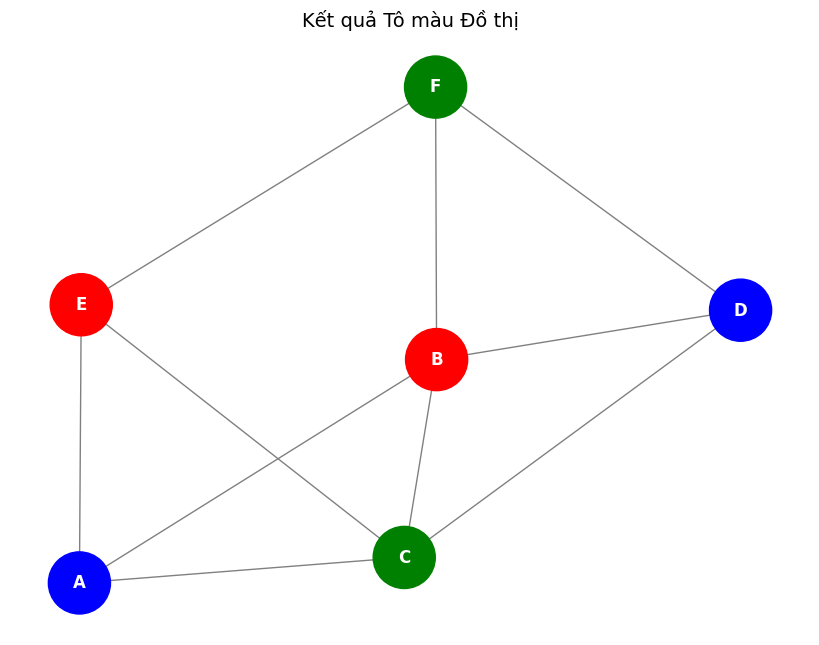

In [3]:
# 1. Tên file đầu vào
input_filename = '/content/input_graph.txt'

# 2. Gọi hàm loadGraph (trả về array/list)
print(f"--- Đang đọc dữ liệu từ {input_filename} ---")
adj_list = loadGraph(input_filename)

if len(adj_list) > 0:
    print("Ma trận kề (Array List):")
    for row in adj_list:
        print(row)
    print("-" * 30)

    # 3. Khởi tạo đối tượng
    graph_app = GraphColoring(adj_list)

    # 4. Giải quyết bài toán
    print("--- Đang thực hiện thuật toán ---")
    result = graph_app.solve()

    # In kết quả
    print("Kết quả tô màu:")
    for node in sorted(result.keys()):
        print(f"Đỉnh {node}: {result[node]}")

    # 5. Hiển thị
    print("-" * 30)
    graph_app.visualize()
else:
    print("Không thể chạy chương trình do lỗi file.")